### Import the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

### Craete the dataset

In [3]:
X, y = make_classification(n_samples=1000, n_classes=2, random_state=42)

### Split the model

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Create a dummy model that give 0 as predicitons for any test data

In [5]:
dummy_model_prob = [0 for _ in range(len(y_test))]
dummy_model_prob

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

### Model buidling

In [6]:
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [7]:
model_prob = model.predict_proba(X_test)
model_prob

array([[4.19931091e-01, 5.80068909e-01],
       [1.40969604e-01, 8.59030396e-01],
       [5.08532523e-01, 4.91467477e-01],
       [1.31791655e-01, 8.68208345e-01],
       [5.21703453e-02, 9.47829655e-01],
       [9.39186107e-01, 6.08138932e-02],
       [7.78171117e-01, 2.21828883e-01],
       [1.88561984e-01, 8.11438016e-01],
       [2.55292019e-01, 7.44707981e-01],
       [6.62765922e-01, 3.37234078e-01],
       [5.01950468e-02, 9.49804953e-01],
       [4.41292340e-01, 5.58707660e-01],
       [9.95620384e-01, 4.37961605e-03],
       [5.44238440e-01, 4.55761560e-01],
       [2.58896799e-01, 7.41103201e-01],
       [8.14685260e-01, 1.85314740e-01],
       [9.40297613e-01, 5.97023874e-02],
       [5.33894329e-02, 9.46610567e-01],
       [1.29962431e-01, 8.70037569e-01],
       [5.14898680e-01, 4.85101320e-01],
       [7.59611431e-03, 9.92403886e-01],
       [7.78460309e-01, 2.21539691e-01],
       [9.49118219e-01, 5.08817814e-02],
       [9.08234080e-01, 9.17659197e-02],
       [3.664788

In [8]:
model_prob = model_prob[:,1]
model_prob

array([0.58006891, 0.8590304 , 0.49146748, 0.86820834, 0.94782965,
       0.06081389, 0.22182888, 0.81143802, 0.74470798, 0.33723408,
       0.94980495, 0.55870766, 0.00437962, 0.45576156, 0.7411032 ,
       0.18531474, 0.05970239, 0.94661057, 0.87003757, 0.48510132,
       0.99240389, 0.22153969, 0.05088178, 0.09176592, 0.96335211,
       0.00685461, 0.99952634, 0.93304963, 0.01782504, 0.96696169,
       0.87666331, 0.98637204, 0.53842264, 0.16137403, 0.29094555,
       0.2174457 , 0.06825803, 0.41370393, 0.05123198, 0.32707131,
       0.0176366 , 0.94397862, 0.07334648, 0.47658739, 0.4775718 ,
       0.01145644, 0.99089654, 0.0057695 , 0.82867984, 0.98767315,
       0.08027578, 0.09388847, 0.01701145, 0.99573184, 0.99562446,
       0.67188378, 0.01809538, 0.10371018, 0.7767842 , 0.17434143,
       0.70211035, 0.10121057, 0.09998253, 0.9994131 , 0.99907375,
       0.04301754, 0.983069  , 0.74475994, 0.70474672, 0.27229494,
       0.10999196, 0.48716764, 0.40803654, 0.14206366, 0.12689

### Calculate the score

In [9]:
dummy_model_auc = roc_auc_score(y_test, dummy_model_prob)
model_auc = roc_auc_score(y_test, model_prob)
print(dummy_model_auc)
print(model_auc)

0.5
0.9244444444444444


### Calculate ROC Curve

In [16]:
dummy_fpr, dummy_tpr, _ = roc_curve(y_test, dummy_model_prob)
model_fpr, model_tpr, threshold = roc_curve(y_test, model_prob)

In [18]:
threshold

array([       inf, 0.99980998, 0.93487186, 0.93304963, 0.90661707,
       0.90270865, 0.88943935, 0.8842701 , 0.88033334, 0.87756048,
       0.87733707, 0.87666331, 0.87003757, 0.86989515, 0.74475994,
       0.7411032 , 0.68654623, 0.67674442, 0.55870766, 0.54573916,
       0.52278008, 0.52167944, 0.49408456, 0.49263798, 0.49146748,
       0.48716764, 0.47658739, 0.46717791, 0.4358776 , 0.41370393,
       0.40937279, 0.40803654, 0.40557588, 0.40480122, 0.39601809,
       0.35672488, 0.35446702, 0.33723408, 0.33508229, 0.29094555,
       0.28263878, 0.27229494, 0.24994703, 0.2174457 , 0.21580504,
       0.21063907, 0.20517504, 0.18531474, 0.17434143, 0.13957697,
       0.13734422, 0.13605737, 0.12836111, 0.11488762, 0.11072312,
       0.10730045, 0.10371018, 0.05088178, 0.04834851, 0.01377753,
       0.00777042, 0.00301175])

### Plot ROC curves

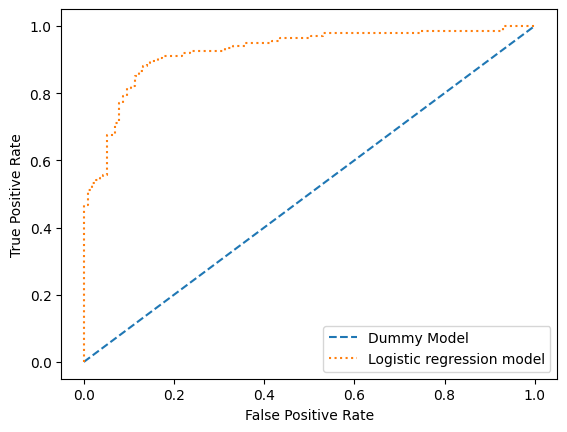

In [17]:
plt.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model')
plt.plot(model_fpr, model_tpr, linestyle='dotted', label='Logistic regression model')

plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()

#### Basically the are under tune logistic curve is higher than the area under the dummy model.
#### This means the logistic model is better obviously